In [2]:
from sklearn import datasets
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [3]:
oliv = datasets.fetch_olivetti_faces()

downloading Olivetti faces from https://ndownloader.figshare.com/files/5976027 to C:\Users\Ansia\scikit_learn_data


In [4]:
oliv.keys()

dict_keys(['data', 'images', 'target', 'DESCR'])

In [5]:
oliv['data'].shape

(400, 4096)

In [6]:
oliv['images'].shape

(400, 64, 64)

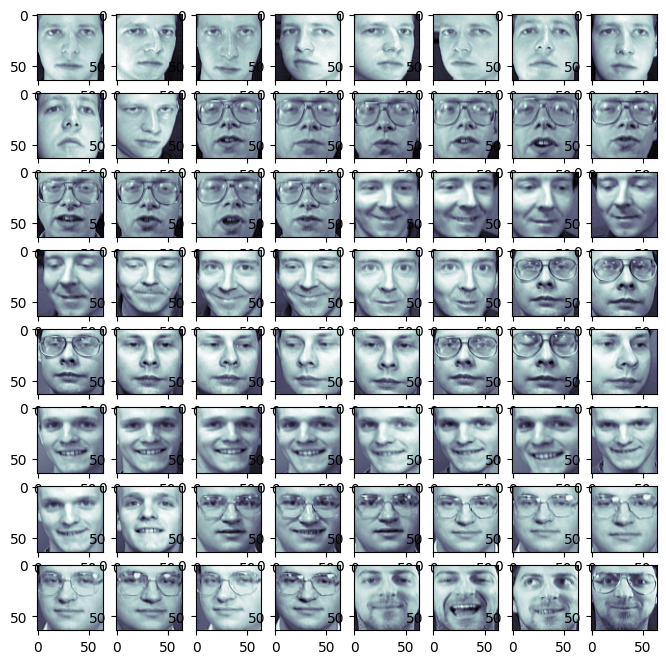

In [7]:
fig = plt.figure(figsize=(8, 8))
for i in range(64):
	ax = fig.add_subplot(8, 8, i + 1)
	ax.imshow(oliv.images[i], cmap=plt.cm.bone)
plt.show()

In [8]:
x = oliv.data
y = oliv.target

In [9]:
pca = PCA()
pca.fit(x)
pca.get_params()

{'copy': True,
 'iterated_power': 'auto',
 'n_components': None,
 'n_oversamples': 10,
 'power_iteration_normalizer': 'auto',
 'random_state': None,
 'svd_solver': 'auto',
 'tol': 0.0,
 'whiten': False}

In [10]:
pca.components_.shape

(400, 4096)

In [11]:
k = 0
total = sum(pca.explained_variance_)
currentSum = 0
while currentSum/total < 0.95:
    currentSum += pca.explained_variance_[k]
    k = k + 1
k

123

### Whiten

In [12]:
pca = PCA(n_components=k, whiten = True)
transformed_data = pca.fit_transform(x)
transformed_data.shape

(400, 123)

In [13]:
x_approx = pca.inverse_transform(transformed_data)
x_approx.shape

(400, 4096)

In [14]:
# Reshape data to 64x64
x_approx_images = x_approx.reshape((400, 64, 64))

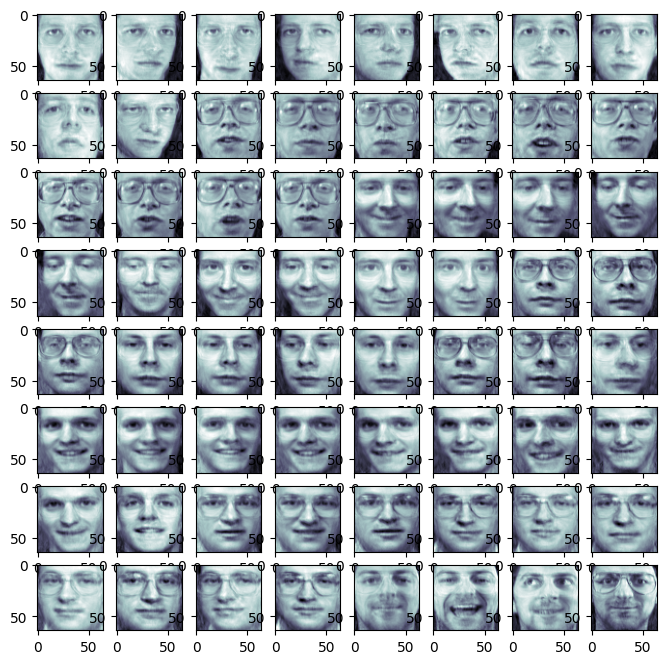

In [15]:
fig = plt.figure(figsize=(8, 8))
for i in range(64):
	ax = fig.add_subplot(8, 8, i + 1)
	ax.imshow(x_approx_images[i], cmap=plt.cm.bone)
plt.show()

In [16]:
eigenv = pca.components_
eigenv.shape

(123, 4096)

In [18]:
eigenfaces = eigenv.reshape((123, 64, 64))

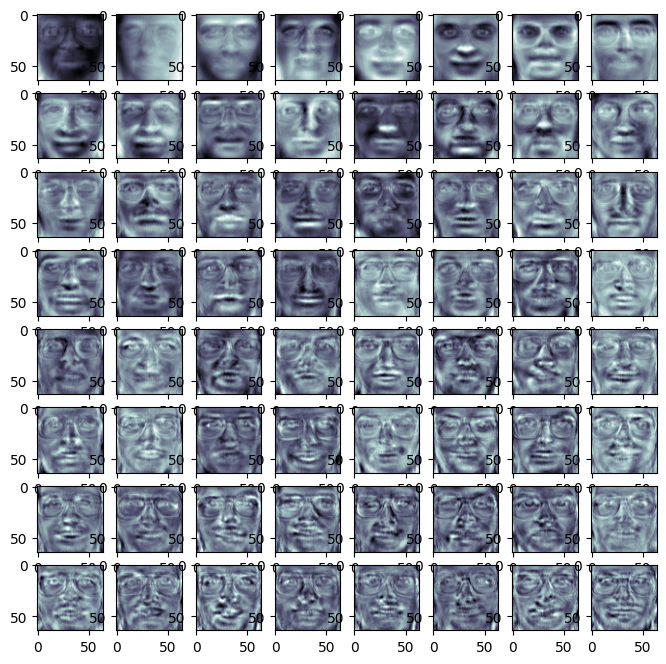

In [20]:
fig = plt.figure(figsize=(8, 8))
for i in range(64):
	ax = fig.add_subplot(8, 8, i + 1)
	ax.imshow(eigenfaces[i], cmap=plt.cm.bone)
plt.show()